<a href="https://colab.research.google.com/github/amanoese/study_keras_for_colaboratory/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_17 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                36928     
__________

0.9932

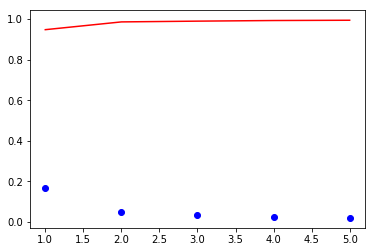

In [18]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

def build_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(64,(3,3), activation='relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(64,(3,3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))

  model.summary()
  return model

(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = build_model()

epochs = 5
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=epochs,batch_size=64)

loss =  history.history['loss']
acc  =  history.history['acc']

epochs_list = range(1,epochs + 1)

plt.plot(epochs_list,loss, 'bo',label='loss')
plt.plot(epochs_list,acc, 'r',label='acc')

test_loss, test_acc = model.evaluate(test_images,test_labels)
test_acc